# Intro
We are going to replicate the visualization given in this . 
It is for the purpose of showing "x>0 breaks the symmetry of the eigenvalues distribution. ". But it looks cool nayways. 

I wish to replicate a visual representation of eigenvalue distributions from a [Twitter post](https://twitter.com/S_Conradi/status/1710009859649806438), where a matrix is involved alongside certain parameters, which are tweaked to observe different outcomes. The matrix and its elements are manipulated, where t1 and t2 are randomly sampled phases, and x is a varying parameter. The visualization presents eigenvalue distributions, generated by altering these parameters, with each snapshot representing a distinct eigenvalue distribution derived from varying values of t1 and t2.

🧐: The problem at its core is understanding and replicating the eigenvalue distribution visualization based on the provided matrix and the method of tweaking parameters t1, t2, and x. A potential solution involves coding a script that mimics this process: generating a multitude of eigenvalue distributions by varying the mentioned parameters, and then visualizing these distributions.

4❓:

Why is the matrix structured in such a manner?
The matrix structure is arbitrary and generated randomly to observe resulting eigenvalue distributions.
Why are t1 and t2 chosen to be randomly sampled phases?
This random sampling introduces variability, leading to diverse eigenvalue distributions.
How does varying x affect the eigenvalue distributions?
It changes the matrix elements, affecting the eigenvalue distributions.
How is the visualization of eigenvalue distributions achieved?
Through the use of the matplotlib library, plotting the eigenvalues derived from the matrices generated.
🌳:

Randomly sample values for t1 and t2.
Vary x within a specified range.
Generate matrices using the provided structure with the sampled and varied parameters.
Calculate eigenvalues for each generated matrix.
Visualize the eigenvalue distributions using matplotlib.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

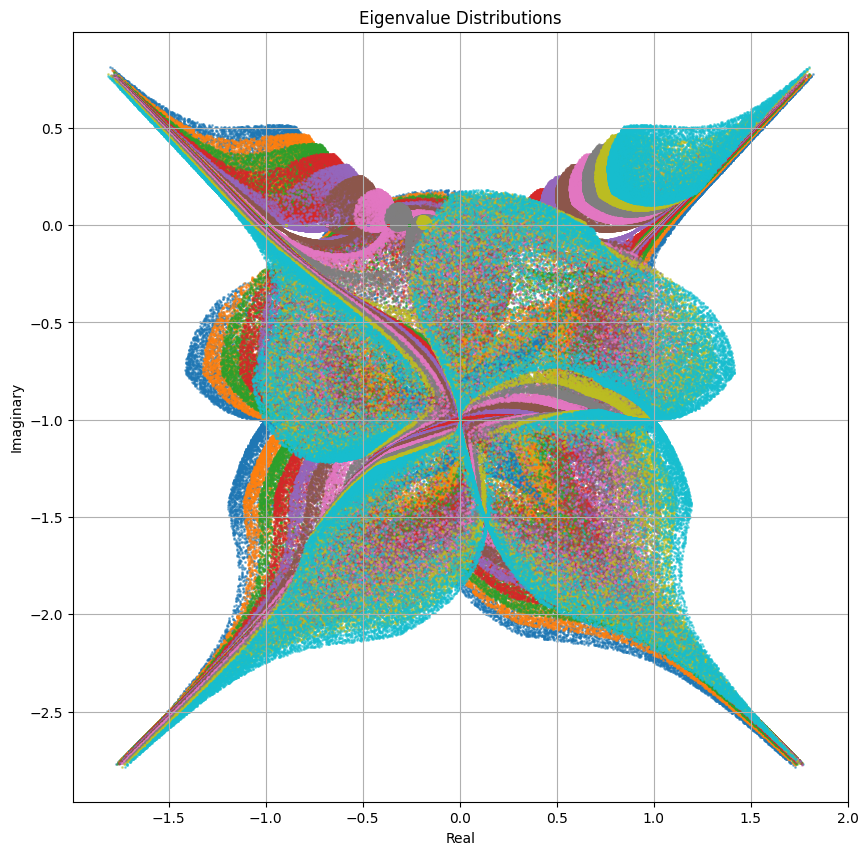

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate the matrix for given parameters t1, t2, and x
def generate_matrix(t1, t2, x):
    return np.array([
        [-1j, 0, t1, 0, 0, t2],
        [0, 0, x, x, 0, x],
        [1j, 0, 0, x, 0, 1j],
        [0, 0, 0, -1j, -1j, 1j],
        [-1j, x, 0, 0, -1j, x],
        [-1j, x, 0, 0, 0, -1j],
    ])

# Set a range for x, and a sample size for t1 and t2
x_range = np.linspace(-1, 1, 20)  # Adjust as necessary
sample_size = 10000  # Number of random samples for t1 and t2

# Prepare a plot
plt.figure(figsize=(10,10))

# Iterate through x values
for x in x_range:
    # Store eigenvalues from all samples
    eigenvalues = np.empty((0,))

    # Randomly sample t1 and t2, generate matrix, and collect eigenvalues
    for _ in range(sample_size):
        t1, t2 = np.random.uniform(-np.pi, np.pi, 2)  # Random phases
        matrix = generate_matrix(t1, t2, x)
        eigenvalues = np.append(eigenvalues, np.linalg.eigvals(matrix))

    # Plot eigenvalues for this x value
    plt.scatter(eigenvalues.real, eigenvalues.imag, s=1, alpha=0.5)

# Display the plot
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Eigenvalue Distributions')
plt.grid(True)
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


In [12]:
def animate_eigens(matrix_func, x_range=np.arange(-np.pi, np.pi, np.pi/10), sample_size=10000,
                   xylim=[-2, 2], filename=None):
    fig, ax = plt.subplots(figsize=(10,10))
    scat = ax.scatter([], [], s=1, c=[], cmap=plt.cm.viridis, edgecolors=None, linewidth=0)  # Changed colormap here

    def init():
        ax.set_xlim(xylim)
        ax.set_ylim(xylim)
        ax.set_xlabel('Real')
        ax.set_ylabel('Imaginary')
        ax.set_title('Eigenvalue Distributions')
        return scat,

    def update(frame):
        x = x_range[frame]
        eigenvalues = np.empty((0,))
        for _ in range(sample_size):
            t1, t2 = np.random.uniform(-np.pi, np.pi, 2)
            matrix = matrix_func(t1, t2, x)
            eigenvalues = np.append(eigenvalues, np.linalg.eigvals(matrix))
        scat.set_offsets(np.c_[eigenvalues.real, eigenvalues.imag])
        scat.set_array(np.angle(eigenvalues))  # Color by phase
        return scat,

    ani = animation.FuncAnimation(fig, update, frames=len(x_range), init_func=init, blit=True, repeat=False)
    if filename is not None:
        ani.save(filename, writer='imagemagick', fps=15)
    plt.close(fig)  # Close the figure to prevent displaying it inline
    return HTML(ani.to_html5_video())


In [21]:


# Function to generate the matrix for given parameters t1, t2, and x
def generate_matrix(t1, t2, x):
    return np.array([
        [-1j, 0, t1, 0, 0, t2],
        [0, 0, x, x, 0, x],
        [1j, 0, 0, x, 0, 1j],
        [0, 0, 0, -1j, -1j, 1j],
        [-1j, x, 0, 0, -1j, x],
        [-1j, x, 0, 0, 0, -1j],
    ])

animate_eigens(generate_matrix, xylim=[-4, 4], filename='eigen_dist_1.gif')

In [15]:
def pattern_matrix(t1, t2, x):
    matrix = np.array([
        [np.sin(t1*x), np.cos(t2*x), np.sin((t1+t2)*x)],
        [np.cos(t1*x), np.sin(t2*x), np.cos((t1+t2)*x)],
        [np.sin((t1-t2)*x), np.cos((t1-t2)*x), np.sin((t1+t2)*x)]
    ])
    return matrix

animate_eigens(pattern_matrix, xylim=[-2, 2], filename='eigen_dist_2.gif', x_range=np.arange(-np.pi, np.pi, np.pi/10))


In [20]:
def harmonic_matrix(t1, t2, x):
    # Defining harmonic relationships
    harmonics_t1 = np.array([t1, 2*t1, 3*t1])
    harmonics_t2 = np.array([t2, 2*t2, 3*t2])
    
    # Creating a matrix using harmonic relationships
    matrix = np.array([
        [np.sin(harmonics_t1 * x), np.cos(harmonics_t2 * x), np.sin((harmonics_t1 + harmonics_t2) * x)],
        [np.cos(harmonics_t1 * x), np.sin(harmonics_t2 * x), np.cos((harmonics_t1 + harmonics_t2) * x)],
        [np.sin((harmonics_t1 - harmonics_t2) * x), np.cos((harmonics_t1 - harmonics_t2) * x), np.sin((harmonics_t1 + harmonics_t2) * x)]
    ])
    return matrix

animate_eigens(harmonic_matrix, xylim=[-2, 2], filename='eigen_dist_polar.gif', x_range=np.arange(-np.pi, np.pi, np.pi/10))